<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/master/06_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install eciespy eth_keys cryptos qrcode base58 
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git

     |████████████████████████████████| 69 kB 3.5 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 555 kB 19.1 MB/s 
     |████████████████████████████████| 2.0 MB 46.0 MB/s 
     |████████████████████████████████| 104 kB 44.6 MB/s 
     |████████████████████████████████| 481 kB 37.4 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1230793 sha256=848a9d3f992802521f05ae8f54d55a5de2e29bddcacada530fd20371d8764324
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40402 sha256=de89e11ee5a0eff84fe605ae1a63bb796fc3299c6db3578d9a1998cd4cc50938
  Stored in directory: /root/.cache/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built cytoolz qrcode
Cloning into 'Colegio_Invisible'...
remote: Enumerating objects: 476, done.
remote: Counting

In [9]:
import hashlib
import os
import getpass
import ecies
import eth_keys
import cryptos
import qrcode
import base58
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def import_privKey(privkey_filepath,password=None):
    if password==None:
        password = getpass.getpass("Input password for decrypting keyfile: ")
    password=password.encode()
    f=open(privkey_filepath,'rb')
    decrypted_bytes=ecies.aes_decrypt(key=hashlib.sha256(password).digest(),cipher_text=f.read())
    privKey=eth_keys.keys.PrivateKey(decrypted_bytes)
    return privKey

def import_pubKey(pubkey_filepath):
    f=open(pubkey_filepath,'rb')
    privKey=eth_keys.keys.PublicKey(f.read())
    return privKey

def import_addr(addr_filepath):
    return open(addr_filepath,'rb').read().decode()

# starting from existing keys

## Empezar desde Keys en Google Drive
## (Start from Keys on Google Drive)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! cp drive/MyDrive/cinv/llaves.zip llaves.zip 
! unzip llaves.zip

## Comenzar desde las Claves en la Disco Local
## (Start from Keys on Local Drive)

In [4]:
from google.colab import files
fu=files.upload();

Saving llaves_.zip to llaves_.zip


In [6]:
! unzip llaves.zip

Archive:  llaves_.zip
   creating: llaves/
 extracting: llaves/mi_prv.enc       
 extracting: llaves/mi_addr.png      
 extracting: llaves/mi_pub.bin       
 extracting: llaves/mi_addr.bin      


In [7]:
! ls llaves

mi_addr.bin  mi_addr.png  mi_prv.enc  mi_pub.bin


In [11]:
privKey=import_privKey('llaves/mi_prv.enc','')
addr=import_addr('llaves/mi_addr.bin')

In [12]:
addr

'DSUQhSxYmqtduoEg5WafnoqfPp59ckMG1L'

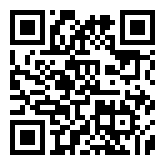

In [31]:
from IPython.display import Image
qr=Image('llaves/mi_addr.png')
display(qr)

# Decrypt Credentials

In [13]:
! python Colegio_Invisible/scripts/aes_decrypt.py Colegio_Invisible/secrets/client_secret.aes Colegio_Invisible/secrets/client_secret.json 

Input password for decryption: 
Success: Colegio_Invisible/secrets/client_secret.aes decryption complete
Written to: Colegio_Invisible/secrets/client_secret.json


In [14]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('Colegio_Invisible/secrets/client_secret.json', scope)
client = gspread.authorize(creds)
sheets = client.open("signatures")

In [15]:
sheets.worksheets()

[<Worksheet 'Multi' id:0>,
 <Worksheet 'Magic' id:2092809244>,
 <Worksheet 'ChorusSignature' id:549527758>,
 <Worksheet 'StealProposal' id:858983463>,
 <Worksheet 'StealSignature' id:475665302>,
 <Worksheet 'test' id:2104752728>]

In [19]:
sheet4=sheets.worksheets()[4]
sheet4.row_values(1)

['name', 'address']

In [18]:
#sheet4.clear()
#sheet4.append_row(["name", "address"])

In [20]:
my_name=input('input name')

input nameDrDoeg


In [22]:
sheet4.append_row([my_name,addr])

{'spreadsheetId': '1z_iLwzlqa_JX7AdRR3OsBeFEgvS0jVYh1oo-X23bMOY',
 'tableRange': 'StealSignature!A1:B1',
 'updates': {'spreadsheetId': '1z_iLwzlqa_JX7AdRR3OsBeFEgvS0jVYh1oo-X23bMOY',
  'updatedCells': 2,
  'updatedColumns': 2,
  'updatedRange': 'StealSignature!A2:B2',
  'updatedRows': 1}}

In [23]:
import pandas as pd

dataframe4 = pd.DataFrame(sheet4.get_all_records())
dataframe4

,name,address
0,DrDoeg,DSUQhSxYmqtduoEg5WafnoqfPp59ckMG1L


In [25]:
recipients=dataframe4.address.tolist()
recipients

['DSUQhSxYmqtduoEg5WafnoqfPp59ckMG1L']

In [27]:
import cryptos

In [29]:
doge=cryptos.Doge()

In [30]:
doge.unspent(addr)

[]